###Aula 13 - Redes Neurais

## Passo 1 - Configuração o ambiente no google colab

In [6]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## Passo 2 - Prepação do conjunto de dados

In [7]:
# Conjunto de dados de treinamento (pequeno e simplificado)
textos_treinamento = [
    "eu gosto de programar em python",
    "python é uma linguagem poderosa",
    "programar é divertido com python",
    "aprenda python e seja feliz",
    "gosto de aprender coisas novas"
]

print(f"Textos de treinamento: {textos_treinamento}")

Textos de treinamento: ['eu gosto de programar em python', 'python é uma linguagem poderosa', 'programar é divertido com python', 'aprenda python e seja feliz', 'gosto de aprender coisas novas']


In [8]:
# Inicializar o Tokenizer
tokenizer = Tokenizer()

# Construir o vocabulário a partir dos textos
tokenizer.fit_on_texts(textos_treinamento)

# Converter textos em sequências de números
sequencias = tokenizer.texts_to_sequences(textos_treinamento)

# Imprimir o vocabulário e as sequências geradas
print(f"Vocabulário (palavra: índice): {tokenizer.word_index}")
print(f"Sequências numéricas dos textos: {sequencias}")

# Calcular o tamanho do vocabulário (incluir o 0 de padding)
total_palavras = len(tokenizer.word_index) + 1
print(f"Tamanho total do vocabulário: {total_palavras}")

Vocabulário (palavra: índice): {'python': 1, 'gosto': 2, 'de': 3, 'programar': 4, 'é': 5, 'eu': 6, 'em': 7, 'uma': 8, 'linguagem': 9, 'poderosa': 10, 'divertido': 11, 'com': 12, 'aprenda': 13, 'e': 14, 'seja': 15, 'feliz': 16, 'aprender': 17, 'coisas': 18, 'novas': 19}
Sequências numéricas dos textos: [[6, 2, 3, 4, 7, 1], [1, 5, 8, 9, 10], [4, 5, 11, 12, 1], [13, 1, 14, 15, 16], [2, 3, 17, 18, 19]]
Tamanho total do vocabulário: 20


In [9]:
# Preparar Entradas (X) e Saídas (y) para a previsão da próxima palavra
# A entrada (X) será uma sequência de palavras, e a saída (y) será a palavra seguinte.

# Determinar o comprimento máximo das sequências para padding
max_comprimento = max([len(seq) for seq in sequencias])
print(f"\nComprimento máximo das sequências antes do padding: {max_comprimento}")

# Criar pares de entrada (sequência parcial) e saída (próxima palavra)
# Ex: "eu gosto de programar" => "em"
#     "gosto de programar em" => "python"
entradas_X = []
saidas_y = []

for seq in sequencias:
    for i in range(1, len(seq)):
        entradas_X.append(seq[:i])         # A sequência até a palavra atual
        saidas_y.append(seq[i])            # A próxima palavra

print(f"\nExemplo de entradas X (parcial): {entradas_X[5]}")
print(f"Exemplo de saídas y (parcial): {saidas_y[5]}")

# Padronizar o comprimento das sequências de entrada
# Todas as sequências de entrada precisam ter o mesmo comprimento para a RNN
entradas_X_padded = pad_sequences(entradas_X, maxlen=max_comprimento-1, padding='pre')
# maxlen é 'max_comprimento - 1' porque as saídas 'y' são a última palavra, então X sempre terá 1 palavra a menos.

# Converter as saídas para o formato one-hot encoding
# Isso é necessário para o modelo de saída na RNN (softmax)
saidas_y_one_hot = tf.keras.utils.to_categorical(saidas_y, num_classes=total_palavras)

print(f"\nExemplo de entradas_X_padded (após padding e truncagem): {entradas_X_padded[5]}")
print(f"Exemplo de saídas_y_one_hot (após one-hot encoding): {saidas_y_one_hot[5]}")
print(f"Formato final das entradas X: {entradas_X_padded.shape}")
print(f"Formato final das saídas y: {saidas_y_one_hot.shape}")



Comprimento máximo das sequências antes do padding: 6

Exemplo de entradas X (parcial): [1]
Exemplo de saídas y (parcial): 5

Exemplo de entradas_X_padded (após padding e truncagem): [0 0 0 0 1]
Exemplo de saídas_y_one_hot (após one-hot encoding): [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Formato final das entradas X: (21, 5)
Formato final das saídas y: (21, 20)


## Passo 3 - Construção do modelo de RNN

In [10]:
# 1.1 Definindo o modelo
# Definir a arquitetura do modelo RNN
modelo_rnn = Sequential()

# 1.2 Camada de Embedding:
# total_palavras: tamanho do vocabulário
# 10: dimensão do vetor de embedding (quantas características queremos para cada palavra)
# input_length: comprimento das sequências de entrada (maxlen - 1)
modelo_rnn.add(Embedding(total_palavras, 10, input_length=entradas_X_padded.shape[1]))

# 1.3 Camada SimpleRNN:
# 32: número de unidades (neurônios) na camada recorrente. Este é o tamanho do estado oculto.
modelo_rnn.add(SimpleRNN(32))

# 1.4 Camada de saída:
# total_palavras: número de neurônios de saída (um para cada palavra no vocabulário)
# activation='softmax': função de ativação para probabilidade (soma 1 para todas as palavras)
modelo_rnn.add(Dense(total_palavras, activation='softmax'))

# 2 Compilar o modelo
modelo_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3 Exibir um resumo da arquitetura do modelo
modelo_rnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Passo 4 - Treinamento do modelo

In [11]:
# 1 Treinando o modelo
print("\nIniciando o treinamento do modelo RNN...")
modelo_rnn.fit(entradas_X_padded, saidas_y_one_hot, epochs=100, verbose=1)
# epochs: quantas vezes o modelo verá todo o conjunto de dados
# verbose=1 para mostrar o progresso do treinamento
print("Treinamento concluído!")



Iniciando o treinamento do modelo RNN...
Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0952 - loss: 2.9890
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.0952 - loss: 2.9807
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0952 - loss: 2.9724
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0952 - loss: 2.9640
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0952 - loss: 2.9555
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0952 - loss: 2.9469
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1429 - loss: 2.9381
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2381 - loss: 2.9290
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2381 - loss: 2.9198
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2381 - loss: 2.9103
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2857 - loss: 2.9005
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━

## Passo 5 - Usa o modelo de previsão de texto

In [12]:
# 1. Função de Previsão
def prever_proxima_palavra(modelo, tokenizer, max_seq_len, texto_base):
    # Prevê a próxima palavra dada um texto base.

    # Converter o texto base para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([texto_base])[0]

    # Padronizar o comprimento da sequência de entrada (precisa ter o mesmo formato que o treinamento)
    # Adiciona padding à esquerda se comprimento < max_seq_len - 1
    sequencia_preenchida = pad_sequences([sequencia_numerica], maxlen=max_seq_len-1, padding='pre')

    # Fazer a previsão
    probabilidades = modelo.predict(sequencia_preenchida, verbose=0)

    # A maior probabilidade corresponde à próxima palavra
    indice_palavra_prevista = np.argmax(probabilidades)

    # Mapear o índice para a palavra
    for palavra, indice in tokenizer.word_index.items():
        if indice == indice_palavra_prevista:
            return palavra

    return ""  # Retorna vazio se a palavra não foi encontrada (improvável com o vocabulário ajustado)

# Comprimento da entrada esperado pelo modelo
comprimento_entrada_modelo = entradas_X_padded.shape[1]

# Testar o modelo com novas frases
texto_teste_1 = "gosto de"
texto_teste_2 = "python é"
texto_teste_3 = "programar em"
texto_teste_4 = "eu gosto de aprender"
texto_teste_5 = "essa palavra nao existe"
texto_teste_input = input("Digite um texto para prever a próxima palavra: ")

print("\nTestes com o modelo RNN:")
print(f"Texto: '{texto_teste_1}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_1)}")
print(f"Texto: '{texto_teste_2}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_2)}")
print(f"Texto: '{texto_teste_3}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_3)}")
print(f"Texto: '{texto_teste_4}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_4)}")
print(f"Texto: '{texto_teste_5}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_5)} (Pode ser imprecisa devido a palavras desconhecidas)")

print(f"Texto: '{texto_teste_input}' -> Próxima palavra prevista: {prever_proxima_palavra(modelo_rnn, tokenizer, comprimento_entrada_modelo, texto_teste_input)}")


Digite um texto para prever a próxima palavra: ola

Testes com o modelo RNN:
Texto: 'gosto de' -> Próxima palavra prevista: programar
Texto: 'python é' -> Próxima palavra prevista: uma
Texto: 'programar em' -> Próxima palavra prevista: python
Texto: 'eu gosto de aprender' -> Próxima palavra prevista: em
Texto: 'essa palavra nao existe' -> Próxima palavra prevista: é (Pode ser imprecisa devido a palavras desconhecidas)
Texto: 'ola' -> Próxima palavra prevista: é


### 2: Modelo de Rede Neural Rede Long Short-Term Memory

## Passo 1 - Configuração do ambiente e Importação das bibliotecas

In [13]:
# Importar bibliotecas necessárias
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Bibliotecas importadas com sucesso!")


Bibliotecas importadas com sucesso!


## Passo 2 - Preparação do conjunto de dados e análise de sentimentos

In [16]:
# Definir o conjunto de dados (frases & rótulos) para análise de sentimentos
dados_sentimento = [
    ("Este filme é lindo e divertido!", "positivo"),
    ("Achei o enredo muito bom.", "positivo"),
    ("A atuação foi de alto nível.", "positivo"),
    ("Não recomendo este filme.", "negativo"),
    ("O filme é fraco e chato.", "negativo"),
    ("Demorou para prender minha atenção.", "negativo"),
    ("Excelente experiência, amei!", "positivo"),
    ("Me diverti bastante com este filme.", "positivo"),
    ("Não gostei do final.", "negativo"),
    ("Achei a história muito ruim.", "negativo"),
    ("O roteiro é maravilhoso!", "positivo"),
    ("Os personagens são incríveis.", "positivo"),
    ("Não vale a pena assistir.", "negativo"),
    ("Muito ruim, não recomendo.", "negativo"),
    ("O filme é excelente, muito criativo!", "positivo"),
    ("O enredo é surpreendente e envolvente.", "positivo"),
    ("Que filme chato e arrastado.", "negativo"),
    ("Me emocionei bastante, muito bom!", "positivo"),
    ("Não suporto esse tipo de filme.", "negativo"),
    ("É uma obra de arte!", "positivo")
]

textos = [dado[0] for dado in dados_sentimento]
sentimentos = [dado[1] for dado in dados_sentimento]

print(f"Total de frases: {len(textos)}")
print(f"Exemplo de texto: {textos[0]}")
print(f"Exemplo de sentimento: {sentimentos[0]}")

# Mapear sentimentos para números (converter "positivo" e "negativo" para 0 e 1)
mapear_sentimentos = {"negativo": 0, "positivo": 1}
rotulos_numericos = [mapear_sentimentos[sent] for sent in sentimentos]

print(f"Sentimentos mapeados para números: {rotulos_numericos}")

# Tokenização de Texto
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(num_words=None, oov_token="<unk>")
tokenizer.fit_on_texts(textos)  # Cria o vocabulário
sequencias = tokenizer.texts_to_sequences(textos)

total_palavras_vocab = len(tokenizer.word_index) + 1  # +1 para o 0 de padding/OOV

print(f"Vocabulário (palavra índice): {tokenizer.word_index}")
print(f"Tamanho total do vocabulário (com OOV): {total_palavras_vocab}")
print(f"Sequência da 1ª frase: {sequencias[0]}")

# Encontrar o comprimento das sequências para padronizar
comprimento_max = max(len(s) for s in sequencias)
print(f"Comprimento máximo das sequências: {comprimento_max}")

# Padronizar as sequências
sequencias_padrao = pad_sequences(sequencias, maxlen=comprimento_max, padding='post')  # 'post' para adicionar zeros no final

# Dividir os dados entre treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    sequencias_padrao, rotulos_numericos, test_size=0.2, random_state=42, stratify=rotulos_numericos
)
y_treino = np.array(y_treino)
y_teste = np.array(y_teste)
print(f"Shape de X_treino: {X_treino.shape}")
print(f"Shape de X_teste: {X_teste.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Shape de y_teste: {y_teste.shape}")


Total de frases: 20
Exemplo de texto: Este filme é lindo e divertido!
Exemplo de sentimento: positivo
Sentimentos mapeados para números: [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
Vocabulário (palavra índice): {'<unk>': 1, 'filme': 2, 'é': 3, 'o': 4, 'muito': 5, 'não': 6, 'e': 7, 'este': 8, 'a': 9, 'de': 10, 'achei': 11, 'enredo': 12, 'bom': 13, 'recomendo': 14, 'chato': 15, 'excelente': 16, 'me': 17, 'bastante': 18, 'ruim': 19, 'lindo': 20, 'divertido': 21, 'atuação': 22, 'foi': 23, 'alto': 24, 'nível': 25, 'fraco': 26, 'demorou': 27, 'para': 28, 'prender': 29, 'minha': 30, 'atenção': 31, 'experiência': 32, 'amei': 33, 'diverti': 34, 'com': 35, 'gostei': 36, 'do': 37, 'final': 38, 'história': 39, 'roteiro': 40, 'maravilhoso': 41, 'os': 42, 'personagens': 43, 'são': 44, 'incríveis': 45, 'vale': 46, 'pena': 47, 'assistir': 48, 'criativo': 49, 'surpreendente': 50, 'envolvente': 51, 'que': 52, 'arrastado': 53, 'emocionei': 54, 'suporto': 55, 'esse': 56, 'tipo': 57, 'uma'

## Passo 3 -Construção do modelo LSTM

In [19]:
# Definir a arquitetura do modelo LSTM
modelo_lstm = Sequential()
max_len = 0

# Camada de Embedding: Converte os índices numéricos das palavras em vetores densos.
# total_palavras_vocab: tamanho do vocabulário
# 50: dimensão do vetor de embedding (pode ser ajustada)
# input_length: comprimento das sequências (max_len)
modelo_lstm.add(Embedding(total_palavras_vocab, 50, input_length=max_len))

# Camada LSTM:
# Define 64 unidades (neurônios) na camada LSTM. Define o tamanho do estado oculto e da célula de memória.
# dropout: taxa de desligamento para evitar overfitting (descarta aleatoriamente neurônios durante o treinamento).
# recurrent_dropout: dropout aplicado nas conexões recorrentes da LSTM.
modelo_lstm.add(LSTM(64, dropout=0.3, recurrent_dropout=0.2))

# Camada Densa de saída:
# 1 unidade (neurônio de saída, pois é um problema de classificação binária (positivo/negativo).
# função de ativação: sigmoid (usada para classificação binária (probabilidade da valuar entre 0 e 1).
modelo_lstm.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
modelo_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Exibir um resumo da arquitetura do modelo
modelo_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##  Passo 4: Treinamento e Avaliação do Modelo

Treinando o modelo LSTM...
Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.3333 - loss: 0.6954 - val_accuracy: 0.5000 - val_loss: 0.6949
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6167 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6950
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6417 - loss: 0.6835 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6333 - loss: 0.6789 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6667 - loss: 0.6692 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6500 - loss: 0.6624 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6833 - loss: 0.6466 - val_accuracy: 0.5000 - val_loss: 0.6954
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7250 - loss: 0.6310 - val_accuracy

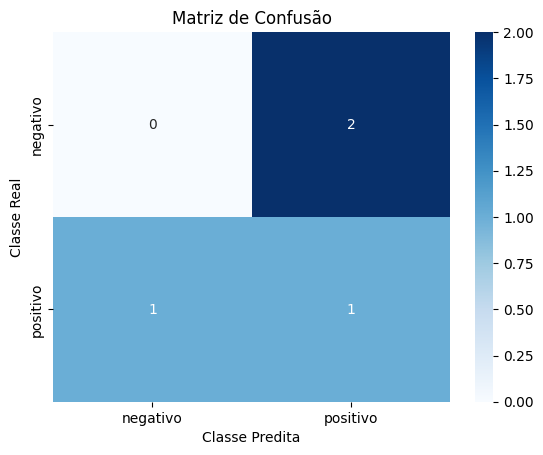

In [20]:
# Treinar o modelo
print("Treinando o modelo LSTM...")
historico = modelo_lstm.fit(
    X_treino, y_treino,
    validation_data=(X_teste, y_teste),  # avalia o modelo em dados não vistos durante o treino
    epochs=10,  # número de épocas de treinamento (pode ser ajustado)
    batch_size=4,  # número de amostras por batch
    verbose=1,  # mostra o progresso do treinamento
    callbacks=[]  # lista de callbacks (ex: early stopping, salvar o modelo durante o treinamento)
)

# Avaliação no conjunto de teste
print("Avaliando o modelo no conjunto de teste...")
perda, acuracia = modelo_lstm.evaluate(X_teste, y_teste, verbose=0)
print(f"Acurácia no conjunto de teste: {acuracia:.2f}")

# Gerar previsões
predicoes = modelo_lstm.predict(X_teste)
predicoes_classes = (predicoes > 0.5).astype(int)  # converter probabilidades para 0 ou 1

# Relatório de Classificação
from sklearn.metrics import classification_report, confusion_matrix
print("\nRelatório de Classificação:")
print(classification_report(y_teste, predicoes_classes, target_names=['negativo', 'positivo']))

# Matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_teste, predicoes_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negativo', 'positivo'], yticklabels=['negativo', 'positivo'])
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.title("Matriz de Confusão")
plt.show()


## Passo 5: Testar o Modelo com Novas Frases:

In [25]:
# Utilizando o modelo treinado
def prever_sentimento(modelo, tokenizer, max_seq_len, frase_nova, mapeamento_sentimento):
    # Prever o sentimento de uma nova frase.

    # Converter a frase para sequência numérica
    sequencia_numerica = tokenizer.texts_to_sequences([frase_nova])

    # Se a frase tiver palavras desconhecidas, o tokenizer pode retornar uma lista vazia ou valores 0
    if not sequencia_numerica[0]:
        print(f"A frase \"{frase_nova}\" contém apenas palavras desconhecidas.")
        return "Sentimento indefinido (palavras não incluídas no vocabulário)"

    # Padronizar o comprimento da sequência
    sequencia_padronizada = pad_sequences(sequencia_numerica,maxlen=max_seq_len, padding='post')

    # Fazer a predição (probabilidade)
    probabilidade_positiva = modelo.predict(sequencia_padronizada, verbose=0)[0][0]

    # Determinar a classe mais provável
    classe_predita = int(round(probabilidade_positiva))

    # Inverter o mapeamento: {0: 'negativo', 1: 'positivo'}
    mapeamento_inverso = {v: k for k, v in mapeamento_sentimento.items()}

    # Classificar no limiar de 0.5
    if probabilidade_positiva >= 0.5:
        return mapeamento_inverso[1] # positivo
    else:
        return mapeamento_inverso[0] # negativo

# Testar o modelo LSTM com novas frases ...
print("\n--- Testando o Modelo LSTM com Novas Frases ---")
frase_nova_1 = "O filme é incrível, maravilhoso, excelente!"
sentimento_1 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_1, mapear_sentimentos)
print(f"Frase: \"{frase_nova_1}\" → Sentimento previsto: {sentimento_1}")

frase_nova_2 = "Que filme ruim, não recomendo."
sentimento_2 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_2, mapear_sentimentos)
print(f"Frase: \"{frase_nova_2}\" → Sentimento previsto: {sentimento_2}")

frase_nova_3 = "Me emocionei com a atuação, foi sensacional!"
sentimento_3 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_3, mapear_sentimentos)
print(f"Frase: \"{frase_nova_3}\" → Sentimento previsto: {sentimento_3}")

frase_nova_4 = "Não gostei do roteiro, muito fraco."
sentimento_4 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_4, mapear_sentimentos)
print(f"Frase: \"{frase_nova_4}\" → Sentimento previsto: {sentimento_4}")

frase_nova_5 = "Esse produto não vale a pena, é caro"
sentimento_5 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_5, mapear_sentimentos)
print(f"Frase: \"{frase_nova_5}\" → Sentimento previsto: {sentimento_5}")

frase_nova_6 = "A atuação é boa mas o enredo é previsível."
sentimento_6 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_6, mapear_sentimentos)
print(f"Frase: \"{frase_nova_6}\" → Sentimento previsto: {sentimento_6}")

frase_nova_7 = "Isso é horrível, que tristeza!"
sentimento_7 = prever_sentimento(modelo_lstm, tokenizer, comprimento_max, frase_nova_7, mapear_sentimentos)
print(f"Frase: \"{frase_nova_7}\" → Sentimento previsto: {sentimento_7}")



--- Testando o Modelo LSTM com Novas Frases ---
Frase: "O filme é incrível, maravilhoso, excelente!" → Sentimento previsto: positivo
Frase: "Que filme ruim, não recomendo." → Sentimento previsto: negativo
Frase: "Me emocionei com a atuação, foi sensacional!" → Sentimento previsto: positivo
Frase: "Não gostei do roteiro, muito fraco." → Sentimento previsto: positivo
Frase: "Esse produto não vale a pena, é caro" → Sentimento previsto: negativo
Frase: "A atuação é boa mas o enredo é previsível." → Sentimento previsto: positivo
Frase: "Isso é horrível, que tristeza!" → Sentimento previsto: positivo
